### **Problem statement**

**Problem identification:** Traditional development strategies focus on increasing years of schooling, assuming it will directly improve economic conditions. However, expanding school attainment alone does not ensure economic growth, especially when schooling does not enhance cognitive skills.<br><br>
**Main claim of Hanushek and Woessmann paper:** Cognitive skills (as measured by standardized tests in math, reading, and science) are more indicative of economic outcomes than the number of schooling years.

##### **Libraries imports**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
# Set dimensions for all the plots of seaborn
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

##### **Methodology**


- **Objective**: Verify/replicate the claims put forward by Hanushek and Woessmann in their paper 'The Role of Cognitive Skills in Economic Development'.
  
- **Analysis Plan**:
  - Conduct a linear regression analysis to test whether cognitive skills, measured through standardized test scores, have a statistically significant relationship with economic growth, potentially stronger than the relationship with years of schooling alone.

- **Data Sources**:
  - Average years of schooling dataset for each country obtained from the World Bank.
  - Average PISA math, reading, and science scores obtained from Kaggle (compiled from OECD).
  - GDP-per-capita data from the World Bank for each country.
  - Open to trade data from the World Bank.
  - Fertility rate data from the World Bank.

- **Model Setup**:
  - Use a regression model where the dependent variable is economic growth, and the independent variables are cognitive skill measures (e.g., average test scores) and years of schooling.

- **Controlling for Variables**:
  - Consider controlling for other variables that may influence growth, like economic institutions, investment rates, and initial income levels.

- **Specification Examples**:
  - Economic Growth = 𝛼 + 𝛽₁ ⋅ Cognitive Skills + 𝛽₂ ⋅ Years of Schooling + 𝜖
  - Run separate regressions for cognitive skills alone, years of schooling alone, and both together to observe differences in significance and explanatory power.

- **Variable Definitions**:
  - Economic growth: Measured by GDP growth rate over a set time period.
  - Cognitive skills: Measured by the averaged scores in math, reading, and science over a set time period.
  - Years of schooling: Measured as the years of schooling for the age group above 25 years of age.
  - Other control variables: Such as fertility rate, averaged over the same time period.

##### **Loading data**

In [3]:
gdpPerCapita_data=pd.read_csv('Data/gdp-per-capita-worldbank.csv')
averageYearsOfSchooling_data=pd.read_csv('Data/average-years-of-schooling.csv')
pisaMathScores_data=pd.read_csv('Data/pisamath.csv')
pisaReadingScores_data=pd.read_csv('Data/pisareading.csv')
pisaScienceScores_data=pd.read_csv('Data/pisascience.csv')
openessToTrade_data=pd.read_csv('Data/openness-to-trade.csv')
fertilityRate_data=pd.read_csv('Data/fertility-rate.csv',header=2)

In [4]:
gdpPerCapita = gdpPerCapita_data.copy()
averageYearsOfSchooling = averageYearsOfSchooling_data.copy()
pisaMathScores = pisaMathScores_data.copy()
pisaReadingScores = pisaReadingScores_data.copy()
pisaScienceScores = pisaScienceScores_data.copy()
openessToTrade = openessToTrade_data.copy()
fertilityRate = fertilityRate_data.copy()

In [5]:
print("### GDP Per Capita Data ###")
print(gdpPerCapita.info())
print("\n")

print("### Average Years of Schooling Data ###")
print(averageYearsOfSchooling.info())
print("\n")

print("### PISA Math Scores Data ###")
print(pisaMathScores.info())
print("\n")

print("### PISA Reading Scores Data ###")
print(pisaReadingScores.info())
print("\n")

print("### PISA Science Scores Data ###")
print(pisaScienceScores.info())
print("\n")

print("### Openness to Trade Data ###")
print(openessToTrade.info())
print("\n")

print("### Fertility Rate Data ###")
print(fertilityRate.info())
print("\n")


### GDP Per Capita Data ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6562 entries, 0 to 6561
Data columns (total 4 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               6562 non-null   object 
 1   Code                                                 6133 non-null   object 
 2   Year                                                 6562 non-null   int64  
 3   GDP per capita, PPP (constant 2017 international $)  6562 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 205.2+ KB
None


### Average Years of Schooling Data ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6557 entries, 0 to 6556
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Entity                      6557 non-n

In [6]:
print("### GDP Per Capita Data Description ###")
print(gdpPerCapita.describe())
print("\n")

print("### Average Years of Schooling Data Description ###")
print(averageYearsOfSchooling.describe())
print("\n")

print("### PISA Math Scores Data Description ###")
print(pisaMathScores.describe())
print("\n")

print("### PISA Reading Scores Data Description ###")
print(pisaReadingScores.describe())
print("\n")

print("### PISA Science Scores Data Description ###")
print(pisaScienceScores.describe())
print("\n")

print("### Openness to Trade Data Description ###")
print(openessToTrade.describe())
print("\n")

print("### Fertility Rate Data Description ###")
print(fertilityRate.describe())

### GDP Per Capita Data Description ###
              Year  GDP per capita, PPP (constant 2017 international $)
count  6562.000000                                        6562.000000  
mean   2006.434014                                       18307.128922  
std       9.415812                                       20344.959620  
min    1990.000000                                         430.413540  
25%    1998.000000                                        3726.793100  
50%    2007.000000                                       10638.246000  
75%    2015.000000                                       26873.173500  
max    2022.000000                                      157600.640000  


### Average Years of Schooling Data Description ###
              Year  Average years of schooling
count  6557.000000                 6557.000000
mean   2006.815312                    7.775560
std       9.338079                    3.239742
min    1990.000000                    0.290000
25%    1999.000000     

#### **Data cleaning and preparation**

In [7]:
all_dataframes = [gdpPerCapita, averageYearsOfSchooling, pisaMathScores, pisaReadingScores, pisaScienceScores, openessToTrade, fertilityRate]

##### **Display data**

In [8]:
all_dataframes[0].head()

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
0,Afghanistan,AFG,2002,1280.4631
1,Afghanistan,AFG,2003,1292.3335
2,Afghanistan,AFG,2004,1260.0605
3,Afghanistan,AFG,2005,1352.3207
4,Afghanistan,AFG,2006,1366.9932


In [9]:
all_dataframes[1].head()

,Entity,Code,Year,Average years of schooling
0,Afghanistan,AFG,1990,0.871962
1,Afghanistan,AFG,1991,0.915267
2,Afghanistan,AFG,1992,0.958573
3,Afghanistan,AFG,1993,1.001878
4,Afghanistan,AFG,1994,1.045184


In [10]:
all_dataframes[2].head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,PISAMATH,BOY,MEANSCORE,A,2003,527.000,NaN
1,AUS,PISAMATH,BOY,MEANSCORE,A,2006,527.000,NaN
2,AUS,PISAMATH,BOY,MEANSCORE,A,2009,519.000,NaN
3,AUS,PISAMATH,BOY,MEANSCORE,A,2012,510.115,NaN
4,AUS,PISAMATH,BOY,MEANSCORE,A,2015,497.000,NaN


In [11]:
all_dataframes[3].head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,PISAREAD,BOY,MEANSCORE,A,2000,513.00,NaN
1,AUS,PISAREAD,BOY,MEANSCORE,A,2003,506.00,NaN
2,AUS,PISAREAD,BOY,MEANSCORE,A,2006,495.00,NaN
3,AUS,PISAREAD,BOY,MEANSCORE,A,2009,496.00,NaN
4,AUS,PISAREAD,BOY,MEANSCORE,A,2012,495.09,NaN


In [12]:
all_dataframes[4].head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,PISASCIENCE,BOY,MEANSCORE,A,2006,527.000,NaN
1,AUS,PISASCIENCE,BOY,MEANSCORE,A,2009,527.000,NaN
2,AUS,PISASCIENCE,BOY,MEANSCORE,A,2012,523.728,NaN
3,AUS,PISASCIENCE,BOY,MEANSCORE,A,2015,511.000,NaN
4,AUS,PISASCIENCE,BOY,MEANSCORE,A,2018,504.000,NaN


In [13]:
all_dataframes[5].head()

,Series Name,Series Code,Country Name,Country Code,1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Trade (% of GDP),NE.TRD.GNFS.ZS,Brazil,BRA,16.8561891361338,20.9677780688456,18.2343303683349,16.4155479824129,15.1552494051265,14.5778875985257,...,25.7859573255328,24.6854058131291,26.9536259360114,24.5336820804399,24.3197343746749,28.8762033759743,28.8902578679414,32.3020785463409,37.6563307568833,38.8160659763397
1,Trade (% of GDP),NE.TRD.GNFS.ZS,Mexico,MEX,17.8768162083936,18.9811111111111,16.5145454545455,18.3570751276441,20.5412871822607,21.5107402652974,...,62.6916747735807,64.0984090351215,70.412974676264,75.6903034088551,76.9521260407254,80.2126616568975,77.3963972815894,76.8702623256235,83.2907026935293,88.4484760684819
2,Trade (% of GDP),NE.TRD.GNFS.ZS,Afghanistan,AFG,..,..,..,..,..,..,...,..,..,..,..,..,..,..,46.7098945514103,51.4117163747271,72.8854696086536
3,Trade (% of GDP),NE.TRD.GNFS.ZS,Albania,ALB,..,..,..,..,..,..,...,75.8737138467897,75.4078455964825,71.801006339647,74.809862823171,78.1942495319136,76.8081841283291,76.2791946495763,59.8297294321628,76.0179821075752,85.1496805230602
4,Trade (% of GDP),NE.TRD.GNFS.ZS,Algeria,DZA,57.0934265311372,74.2388192371426,76.6545354056848,70.1732568821597,72.3268842306998,65.7045688895452,...,59.151008157244,56.9235419669867,53.2046225904145,49.7609327925216,49.8208161712587,52.4361676779223,46.5068426081672,40.3897565625388,47.2709030076405,51.8412067931037


In [14]:
all_dataframes[-1].head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,...,1.972000,1.953000,1.839000,1.587000,1.486000,1.325000,1.180000,1.179000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.724125,6.742752,6.762930,6.778712,6.788420,6.800322,...,4.677618,4.615670,4.570409,4.527705,4.482898,4.416900,4.354709,4.288788,NaN,NaN
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.282000,7.284000,7.292000,7.302000,7.304000,7.305000,...,5.405000,5.262000,5.129000,5.002000,4.870000,4.750000,4.643000,4.523000,NaN,NaN
3,Africa Western and Central,AFW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.458448,6.471518,6.491826,6.506088,6.525355,6.541102,...,5.385059,5.328709,5.255345,5.186319,5.118932,5.049329,4.978662,4.897322,NaN,NaN
4,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,...,5.774000,5.686000,5.600000,5.519000,5.442000,5.371000,5.304000,5.209000,NaN,NaN


##### **Clean the GDP Per Capita data**

In [15]:
gdpPerCapita.rename(columns={'Entity': 'country'}, inplace=True)
gdpPerCapita.drop(columns=['Code'], inplace=True)
gdpPerCapita = gdpPerCapita[(gdpPerCapita['Year'] >= 2006) & (gdpPerCapita['Year'] <= 2018)]
gdpPerCapita.sort_values(by=['country', 'Year'], inplace=True)
gdpPerCapita.reset_index(drop=True, inplace=True)
gdpPerCapita.head()

/var/folders/5y/6809sf6s565br36pw0ny2yhr0000gn/T/ipykernel_24532/2892738478.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdpPerCapita.sort_values(by=['country', 'Year'], inplace=True)


,country,Year,"GDP per capita, PPP (constant 2017 international $)"
0,Afghanistan,2006,1366.9932
1,Afghanistan,2007,1528.3446
2,Afghanistan,2008,1556.8445
3,Afghanistan,2009,1823.7426
4,Afghanistan,2010,2026.1638


In [16]:
# Function to calculate average annual growth rate
def calculate_average_annual_growth_rate(df):
  start_year = df['Year'].min()
  end_year = df['Year'].max()
  start_value = df[df['Year'] == start_year]['GDP per capita, PPP (constant 2017 international $)'].values[0]
  end_value = df[df['Year'] == end_year]['GDP per capita, PPP (constant 2017 international $)'].values[0]
  total_growth_rate = (end_value / start_value) - 1
  n = end_year - start_year
  average_annual_growth_rate = (1 + total_growth_rate) ** (1 / n) - 1
  return average_annual_growth_rate

gdp_growth_rates = gdpPerCapita.groupby(['country']).apply(calculate_average_annual_growth_rate).reset_index()
gdp_growth_rates.columns = ['country', 'average_annual_growth_rate']

gdp_growth_rates.head()

/var/folders/5y/6809sf6s565br36pw0ny2yhr0000gn/T/ipykernel_24532/1119187521.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gdp_growth_rates = gdpPerCapita.groupby(['country']).apply(calculate_average_annual_growth_rate).reset_index()


,country,average_annual_growth_rate
0,Afghanistan,0.034794
1,Albania,0.037429
2,Algeria,0.008509
3,Angola,0.002482
4,Antigua and Barbuda,-0.006428


In [17]:
gdp_growth_rates = gdp_growth_rates[gdp_growth_rates['average_annual_growth_rate'] >= 0]

##### **Clean the Average Years of Schooling data**

In [18]:
averageYearsOfSchooling.rename(columns={'Entity': 'country'}, inplace=True)
averageYearsOfSchooling.drop(columns=['Code'], inplace=True)
averageYearsOfSchooling = averageYearsOfSchooling[(averageYearsOfSchooling['Year'] >= 2006) & (averageYearsOfSchooling['Year'] <= 2018)]
averageYearsOfSchooling.sort_values(by=['country', 'Year'], inplace=True)
averageYearsOfSchooling.reset_index(drop=True, inplace=True)
averageYearsOfSchooling.head()

/var/folders/5y/6809sf6s565br36pw0ny2yhr0000gn/T/ipykernel_24532/1871461184.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  averageYearsOfSchooling.sort_values(by=['country', 'Year'], inplace=True)


,country,Year,Average years of schooling
0,Afghanistan,2006,1.595281
1,Afghanistan,2007,1.669017
2,Afghanistan,2008,1.742754
3,Afghanistan,2009,1.816490
4,Afghanistan,2010,1.890226


In [19]:
average_years_of_schooling_avg = averageYearsOfSchooling.groupby('country')['Average years of schooling'].mean().reset_index()
average_years_of_schooling_avg.head()

,country,Average years of schooling
0,Afghanistan,2.007757
1,Africa,5.266433
2,Albania,9.734349
3,Algeria,7.232039
4,Andorra,10.579417


##### **Clean the Pisa Scores data**

In [20]:
# Filter dataframes based on TIME and drop unnecessary columns
pisaMathScores_filtered = pisaMathScores_data[(pisaMathScores_data['TIME'] >= 2006) & (pisaMathScores_data['TIME'] <= 2018)][['LOCATION', 'Value','TIME']]
pisaReadingScores_filtered = pisaReadingScores_data[(pisaReadingScores_data['TIME'] >= 2006) & (pisaReadingScores_data['TIME'] <= 2018)][['LOCATION', 'Value','TIME']]
pisaScienceScores_filtered = pisaScienceScores_data[(pisaScienceScores_data['TIME'] >= 2006) & (pisaScienceScores_data['TIME'] <= 2018)][['LOCATION', 'Value','TIME']]

# Rename the 'Value' column to distinguish them after merging
pisaMathScores_filtered.rename(columns={'Value': 'Math_Score'}, inplace=True)
pisaReadingScores_filtered.rename(columns={'Value': 'Reading_Score'}, inplace=True)
pisaScienceScores_filtered.rename(columns={'Value': 'Science_Score'}, inplace=True)


In [21]:
average_pisa_math_scores = pisaMathScores_filtered.groupby('LOCATION')['Math_Score'].mean().reset_index()
average_pisa_math_scores.head()

,LOCATION,Math_Score
0,AUS,504.5936
1,AUT,501.5180
2,BEL,513.0016
3,BRA,381.9694
4,CAN,519.9176


In [22]:
average_pisa_reading_scores = pisaReadingScores_filtered.groupby('LOCATION')['Reading_Score'].mean().reset_index()
average_pisa_reading_scores.head()

,LOCATION,Reading_Score
0,AUS,509.242133
1,AUT,487.426167
2,BEL,501.757133
3,BRA,406.461200
4,CAN,524.344600


In [23]:
average_pisa_science_scores = pisaScienceScores_filtered.groupby('LOCATION')['Science_Score'].mean().reset_index()
average_pisa_science_scores.head()

,LOCATION,Science_Score
0,AUS,517.723467
1,AUT,500.465583
2,BEL,504.514667
3,BRA,400.832667
4,CAN,526.728533


In [24]:
# Combine the average PISA scores dataframes on 'LOCATION'
combined_pisa_scores = average_pisa_math_scores.merge(average_pisa_reading_scores, on='LOCATION').merge(average_pisa_science_scores, on='LOCATION')

# Rename 'LOCATION' to 'country'
combined_pisa_scores.rename(columns={'LOCATION': 'country'}, inplace=True)

combined_pisa_scores.head()

,country,Math_Score,Reading_Score,Science_Score
0,AUS,504.5936,509.242133,517.723467
1,AUT,501.5180,487.426167,500.465583
2,BEL,513.0016,501.757133,504.514667
3,BRA,381.9694,406.461200,400.832667
4,CAN,519.9176,524.344600,526.728533


In [25]:
# Create a mapping dictionary for country codes to country names
country_code_to_name = {
  'AFG': 'Afghanistan', 'ALB': 'Albania', 'DZA': 'Algeria', 'AGO': 'Angola', 'ARG': 'Argentina',
  'ARM': 'Armenia', 'AUS': 'Australia', 'AUT': 'Austria', 'AZE': 'Azerbaijan', 'BHR': 'Bahrain',
  'BGD': 'Bangladesh', 'BLR': 'Belarus', 'BEL': 'Belgium', 'BLZ': 'Belize', 'BEN': 'Benin',
  'BTN': 'Bhutan', 'BOL': 'Bolivia', 'BIH': 'Bosnia and Herzegovina', 'BWA': 'Botswana', 'BRA': 'Brazil',
  'BRN': 'Brunei Darussalam', 'BGR': 'Bulgaria', 'BFA': 'Burkina Faso', 'BDI': 'Burundi', 'CPV': 'Cabo Verde',
  'KHM': 'Cambodia', 'CMR': 'Cameroon', 'CAN': 'Canada', 'CAF': 'Central African Republic', 'TCD': 'Chad',
  'CHL': 'Chile', 'CHN': 'China', 'COL': 'Colombia', 'COM': 'Comoros', 'COG': 'Congo', 'CRI': 'Costa Rica',
  'CIV': 'Côte d\'Ivoire', 'HRV': 'Croatia', 'CUB': 'Cuba', 'CYP': 'Cyprus', 'CZE': 'Czech Republic',
  'DNK': 'Denmark', 'DJI': 'Djibouti', 'DMA': 'Dominica', 'DOM': 'Dominican Republic', 'ECU': 'Ecuador',
  'EGY': 'Egypt', 'SLV': 'El Salvador', 'GNQ': 'Equatorial Guinea', 'ERI': 'Eritrea', 'EST': 'Estonia',
  'SWZ': 'Eswatini', 'ETH': 'Ethiopia', 'FJI': 'Fiji', 'FIN': 'Finland', 'FRA': 'France', 'GAB': 'Gabon',
  'GMB': 'Gambia', 'GEO': 'Georgia', 'DEU': 'Germany', 'GHA': 'Ghana', 'GRC': 'Greece', 'GRD': 'Grenada',
  'GTM': 'Guatemala', 'GIN': 'Guinea', 'GNB': 'Guinea-Bissau', 'GUY': 'Guyana', 'HTI': 'Haiti', 'HND': 'Honduras',
  'HKG': 'Hong Kong', 'HUN': 'Hungary', 'ISL': 'Iceland', 'IND': 'India', 'IDN': 'Indonesia', 'IRN': 'Iran',
  'IRQ': 'Iraq', 'IRL': 'Ireland', 'ISR': 'Israel', 'ITA': 'Italy', 'JAM': 'Jamaica', 'JPN': 'Japan',
  'JOR': 'Jordan', 'KAZ': 'Kazakhstan', 'KEN': 'Kenya', 'KIR': 'Kiribati', 'PRK': 'Korea, North', 'KOR': 'Korea, South',
  'KWT': 'Kuwait', 'KGZ': 'Kyrgyzstan', 'LAO': 'Laos', 'LVA': 'Latvia', 'LBN': 'Lebanon', 'LSO': 'Lesotho',
  'LBR': 'Liberia', 'LBY': 'Libya', 'LIE': 'Liechtenstein', 'LTU': 'Lithuania', 'LUX': 'Luxembourg', 'MDG': 'Madagascar',
  'MWI': 'Malawi', 'MYS': 'Malaysia', 'MDV': 'Maldives', 'MLI': 'Mali', 'MLT': 'Malta', 'MHL': 'Marshall Islands',
  'MRT': 'Mauritania', 'MUS': 'Mauritius', 'MEX': 'Mexico', 'FSM': 'Micronesia', 'MDA': 'Moldova', 'MCO': 'Monaco',
  'MNG': 'Mongolia', 'MNE': 'Montenegro', 'MAR': 'Morocco', 'MOZ': 'Mozambique', 'MMR': 'Myanmar', 'NAM': 'Namibia',
  'NRU': 'Nauru', 'NPL': 'Nepal', 'NLD': 'Netherlands', 'NZL': 'New Zealand', 'NIC': 'Nicaragua', 'NER': 'Niger',
  'NGA': 'Nigeria', 'MKD': 'North Macedonia', 'NOR': 'Norway', 'OMN': 'Oman', 'PAK': 'Pakistan', 'PLW': 'Palau',
  'PAN': 'Panama', 'PNG': 'Papua New Guinea', 'PRY': 'Paraguay', 'PER': 'Peru', 'PHL': 'Philippines', 'POL': 'Poland',
  'PRT': 'Portugal', 'QAT': 'Qatar', 'ROU': 'Romania', 'RUS': 'Russia', 'RWA': 'Rwanda', 'KNA': 'Saint Kitts and Nevis',
  'LCA': 'Saint Lucia', 'VCT': 'Saint Vincent and the Grenadines', 'WSM': 'Samoa', 'SMR': 'San Marino', 'STP': 'Sao Tome and Principe',
  'SAU': 'Saudi Arabia', 'SEN': 'Senegal', 'SRB': 'Serbia', 'SYC': 'Seychelles', 'SLE': 'Sierra Leone', 'SGP': 'Singapore',
  'SVK': 'Slovakia', 'SVN': 'Slovenia', 'SLB': 'Solomon Islands', 'SOM': 'Somalia', 'ZAF': 'South Africa', 'SSD': 'South Sudan',
  'ESP': 'Spain', 'LKA': 'Sri Lanka', 'SDN': 'Sudan', 'SUR': 'Suriname', 'SWE': 'Sweden', 'CHE': 'Switzerland', 'SYR': 'Syria',
  'TWN': 'Taiwan', 'TJK': 'Tajikistan', 'TZA': 'Tanzania', 'THA': 'Thailand', 'TLS': 'Timor-Leste', 'TGO': 'Togo', 'TON': 'Tonga',
  'TTO': 'Trinidad and Tobago', 'TUN': 'Tunisia', 'TUR': 'Turkey', 'TKM': 'Turkmenistan', 'TUV': 'Tuvalu', 'UGA': 'Uganda',
  'UKR': 'Ukraine', 'ARE': 'United Arab Emirates', 'GBR': 'United Kingdom', 'USA': 'United States', 'URY': 'Uruguay',
  'UZB': 'Uzbekistan', 'VUT': 'Vanuatu', 'VEN': 'Venezuela', 'VNM': 'Vietnam', 'YEM': 'Yemen', 'ZMB': 'Zambia', 'ZWE': 'Zimbabwe'
}

# Apply the mapping to the relevant dataframes
pisaMathScores_filtered['LOCATION'] = pisaMathScores_filtered['LOCATION'].map(country_code_to_name)
pisaReadingScores_filtered['LOCATION'] = pisaReadingScores_filtered['LOCATION'].map(country_code_to_name)
pisaScienceScores_filtered['LOCATION'] = pisaScienceScores_filtered['LOCATION'].map(country_code_to_name)
combined_pisa_scores['country'] = combined_pisa_scores['country'].map(country_code_to_name)
# Display the updated dataframes
combined_pisa_scores.head()

,country,Math_Score,Reading_Score,Science_Score
0,Australia,504.5936,509.242133,517.723467
1,Austria,501.5180,487.426167,500.465583
2,Belgium,513.0016,501.757133,504.514667
3,Brazil,381.9694,406.461200,400.832667
4,Canada,519.9176,524.344600,526.728533


In [26]:
combined_pisa_scores['pisa_score'] = combined_pisa_scores[['Math_Score', 'Reading_Score', 'Science_Score']].mean(axis=1)
final_pisa_scores = combined_pisa_scores[['country', 'pisa_score']]
final_pisa_scores.head()

,country,pisa_score
0,Australia,510.519733
1,Austria,496.469917
2,Belgium,506.424467
3,Brazil,396.421089
4,Canada,523.663578


##### **Combine data**

In [27]:
common_countries = set(gdp_growth_rates['country']).intersection(
  set(average_years_of_schooling_avg['country']),
  set(final_pisa_scores['country'])
)

print(list(common_countries))

['Israel', 'Iceland', 'Spain', 'Norway', 'Hungary', 'Costa Rica', 'New Zealand', 'Hong Kong', 'Estonia', 'Austria', 'Switzerland', 'Singapore', 'Peru', 'Ireland', 'Mexico', 'Canada', 'Luxembourg', 'Denmark', 'Indonesia', 'Slovakia', 'Slovenia', 'United States', 'Latvia', 'Portugal', 'Lithuania', 'Netherlands', 'Colombia', 'Chile', 'Sweden', 'Poland', 'Finland', 'Japan', 'Belgium', 'Germany', 'France', 'Brazil', 'United Kingdom', 'Turkey', 'Russia', 'Australia']


In [28]:
gdp_growth_rates_filtered = gdp_growth_rates[gdp_growth_rates['country'].isin(common_countries)]
gdp_growth_rates_filtered.head()

,country,average_annual_growth_rate
8,Australia,0.010736
9,Austria,0.006905
16,Belgium,0.006638
24,Brazil,0.010630
31,Canada,0.006285


In [29]:
average_years_of_schooling_avg_filtered = average_years_of_schooling_avg[average_years_of_schooling_avg['country'].isin(common_countries)]
average_years_of_schooling_avg_filtered.head()

,country,Average years of schooling
11,Australia,12.114367
12,Austria,11.827474
19,Belgium,11.588927
26,Brazil,7.161545
33,Canada,13.579273


In [30]:
final_pisa_scores_filtered = final_pisa_scores[final_pisa_scores['country'].isin(common_countries)]
final_pisa_scores_filtered.head()

,country,pisa_score
0,Australia,510.519733
1,Austria,496.469917
2,Belgium,506.424467
3,Brazil,396.421089
4,Canada,523.663578


In [31]:
# Merge dataframes on 'country'
df_no_controls = gdp_growth_rates_filtered.merge(
  average_years_of_schooling_avg_filtered, on='country'
).merge(
  final_pisa_scores_filtered, on='country'
)

df_no_controls.head()


,country,average_annual_growth_rate,Average years of schooling,pisa_score
0,Australia,0.010736,12.114367,510.519733
1,Austria,0.006905,11.827474,496.469917
2,Belgium,0.006638,11.588927,506.424467
3,Brazil,0.010630,7.161545,396.421089
4,Canada,0.006285,13.579273,523.663578


In [32]:
df_no_controls['country'].nunique()

40

#### **Regression without controls**

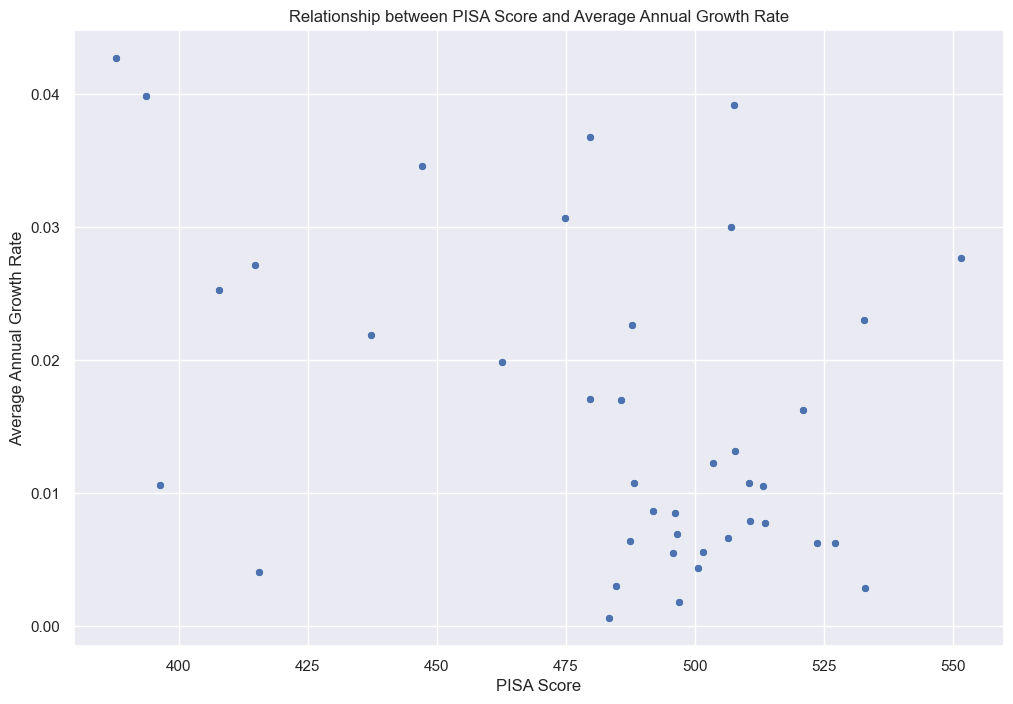

In [33]:
# Scatter plot to visualize the relationship between pisa_score and average_annual_growth_rate
plt.figure(figsize=(12, 8))
sns.scatterplot(x='pisa_score', y='average_annual_growth_rate', data=df_no_controls)
plt.title('Relationship between PISA Score and Average Annual Growth Rate')
plt.xlabel('PISA Score')
plt.ylabel('Average Annual Growth Rate')
plt.show()

##### **Regression with gdp and pisa scores**

In [34]:
X = df_no_controls['pisa_score']
X = sm.add_constant(X)  
y = df_no_controls['average_annual_growth_rate']
model1 = sm.OLS(y, X).fit()
print(model1.summary())

                                OLS Regression Results                                
Dep. Variable:     average_annual_growth_rate   R-squared:                       0.161
Model:                                    OLS   Adj. R-squared:                  0.139
Method:                         Least Squares   F-statistic:                     7.311
Date:                        Thu, 07 Nov 2024   Prob (F-statistic):             0.0102
Time:                                15:49:13   Log-Likelihood:                 124.21
No. Observations:                          40   AIC:                            -244.4
Df Residuals:                              38   BIC:                            -241.0
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

##### **Regression with gdp and average years of schooling**

In [35]:
X = df_no_controls['Average years of schooling']
X = sm.add_constant(X)
model2 = sm.OLS(y, X).fit()
print(model2.summary())

                                OLS Regression Results                                
Dep. Variable:     average_annual_growth_rate   R-squared:                       0.114
Model:                                    OLS   Adj. R-squared:                  0.091
Method:                         Least Squares   F-statistic:                     4.898
Date:                        Thu, 07 Nov 2024   Prob (F-statistic):             0.0330
Time:                                15:49:13   Log-Likelihood:                 123.12
No. Observations:                          40   AIC:                            -242.2
Df Residuals:                              38   BIC:                            -238.9
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

##### **Regression with gdp and average years of schooling combined with pisa scores**

In [36]:
X = df_no_controls[['pisa_score', 'Average years of schooling']]
X = sm.add_constant(X)
model3 = sm.OLS(y, X).fit()
print(model3.summary())

                                OLS Regression Results                                
Dep. Variable:     average_annual_growth_rate   R-squared:                       0.163
Model:                                    OLS   Adj. R-squared:                  0.118
Method:                         Least Squares   F-statistic:                     3.606
Date:                        Thu, 07 Nov 2024   Prob (F-statistic):             0.0371
Time:                                15:49:13   Log-Likelihood:                 124.25
No. Observations:                          40   AIC:                            -242.5
Df Residuals:                              37   BIC:                            -237.4
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

#### **Regression with controls**

##### **Regression with Initial GDP of 2006 as control variable**

In [51]:
df_with_controls = df_no_controls.copy()
gdp_2006 = gdpPerCapita[gdpPerCapita['Year'] == 2006].set_index('country')['GDP per capita, PPP (constant 2017 international $)'].to_dict()
df_with_controls['initial_gdp'] = df_with_controls['country'].map(gdp_2006)

df_with_controls.head()

,country,average_annual_growth_rate,Average years of schooling,pisa_score,initial_gdp
0,Australia,0.010736,12.114367,510.519733,43182.387
1,Austria,0.006905,11.827474,496.469917,50840.695
2,Belgium,0.006638,11.588927,506.424467,47212.580
3,Brazil,0.010630,7.161545,396.421089,12877.444
4,Canada,0.006285,13.579273,523.663578,45401.465


In [53]:
y = df_with_controls['average_annual_growth_rate']
X = df_with_controls[['pisa_score', 'Average years of schooling', 'initial_gdp']]
X = sm.add_constant(X)  
model = sm.OLS(y, X).fit()
print(model.summary())


                                OLS Regression Results                                
Dep. Variable:     average_annual_growth_rate   R-squared:                       0.310
Model:                                    OLS   Adj. R-squared:                  0.253
Method:                         Least Squares   F-statistic:                     5.400
Date:                        Thu, 07 Nov 2024   Prob (F-statistic):            0.00358
Time:                                15:51:19   Log-Likelihood:                 128.12
No. Observations:                          40   AIC:                            -248.2
Df Residuals:                              36   BIC:                            -241.5
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

##### **Clean the Openness To Trade data**

In [39]:
openessToTrade_filtered = openessToTrade.copy()
openessToTrade_filtered = openessToTrade_filtered[openessToTrade_filtered['Country Name'].isin(df_no_controls['country'])]
openessToTrade_filtered.head()

,Series Name,Series Code,Country Name,Country Code,1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Trade (% of GDP),NE.TRD.GNFS.ZS,Brazil,BRA,16.8561891361338,20.9677780688456,18.2343303683349,16.4155479824129,15.1552494051265,14.5778875985257,...,25.7859573255328,24.6854058131291,26.9536259360114,24.5336820804399,24.3197343746749,28.8762033759743,28.8902578679414,32.3020785463409,37.6563307568833,38.8160659763397
1,Trade (% of GDP),NE.TRD.GNFS.ZS,Mexico,MEX,17.8768162083936,18.9811111111111,16.5145454545455,18.3570751276441,20.5412871822607,21.5107402652974,...,62.6916747735807,64.0984090351215,70.412974676264,75.6903034088551,76.9521260407254,80.2126616568975,77.3963972815894,76.8702623256235,83.2907026935293,88.4484760684819
12,Trade (% of GDP),NE.TRD.GNFS.ZS,Australia,AUS,25.1324769169008,26.3228521255094,28.9705985544874,26.8632720641167,28.631123769529,28.1777684707495,...,41.2501910637454,42.4430282022511,41.5942804140742,40.7946418668351,41.9422091216328,43.3470784937935,45.7489633556611,44.1430455941203,39.7023602363157,45.1367444404109
13,Trade (% of GDP),NE.TRD.GNFS.ZS,Austria,AUT,54.4568197404044,59.5677321118563,56.5991343539106,59.9162824894445,60.2775963946407,59.6679872436748,...,104.066414086373,103.503535251069,102.42731538918,100.982078278741,104.938844932748,107.923639505579,107.892514611522,99.7082951791188,110.984958052906,123.685438704967
20,Trade (% of GDP),NE.TRD.GNFS.ZS,Belgium,BEL,94.1440940214668,105.271077601296,91.5237486786852,96.8157584257173,95.6775227443742,92.3126039376739,...,157.850845041743,158.783215919076,154.192546509323,157.66502598438,165.32583634966,166.494787097425,164.166215073989,155.335075364489,174.038993727527,193.033138661134


In [40]:
openessToTrade_filtered.rename(columns=lambda x: x.split('[')[0] if '[' in x else x, inplace=True)
openessToTrade_filtered.drop(columns=['Series Name', 'Series Code', 'Country Code'], inplace=True)
openessToTrade_filtered.head()

,Country Name,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Brazil,16.8561891361338,20.9677780688456,18.2343303683349,16.4155479824129,15.1552494051265,14.5778875985257,16.5668826070039,20.1554074919697,19.6329239927092,...,25.7859573255328,24.6854058131291,26.9536259360114,24.5336820804399,24.3197343746749,28.8762033759743,28.8902578679414,32.3020785463409,37.6563307568833,38.8160659763397
1,Mexico,17.8768162083936,18.9811111111111,16.5145454545455,18.3570751276441,20.5412871822607,21.5107402652974,23.6401173402868,22.4346196504217,22.1172749435935,...,62.6916747735807,64.0984090351215,70.412974676264,75.6903034088551,76.9521260407254,80.2126616568975,77.3963972815894,76.8702623256235,83.2907026935293,88.4484760684819
12,Australia,25.1324769169008,26.3228521255094,28.9705985544874,26.8632720641167,28.631123769529,28.1777684707495,29.6241715859235,32.2987549401242,31.6038540805209,...,41.2501910637454,42.4430282022511,41.5942804140742,40.7946418668351,41.9422091216328,43.3470784937935,45.7489633556611,44.1430455941203,39.7023602363157,45.1367444404109
13,Austria,54.4568197404044,59.5677321118563,56.5991343539106,59.9162824894445,60.2775963946407,59.6679872436748,63.3172195649945,66.8250056155535,68.3965493602774,...,104.066414086373,103.503535251069,102.42731538918,100.982078278741,104.938844932748,107.923639505579,107.892514611522,99.7082951791188,110.984958052906,123.685438704967
20,Belgium,94.1440940214668,105.271077601296,91.5237486786852,96.8157584257173,95.6775227443742,92.3126039376739,101.572970541061,103.055447784319,110.221352145195,...,157.850845041743,158.783215919076,154.192546509323,157.66502598438,165.32583634966,166.494787097425,164.166215073989,155.335075364489,174.038993727527,193.033138661134


In [41]:
openessToTrade_filtered = openessToTrade_filtered.melt(id_vars=['Country Name'], var_name='Year', value_name='openessTradeValue')
openessToTrade_filtered['Year'] = openessToTrade_filtered['Year'].astype(int)
openessToTrade_filtered = openessToTrade_filtered[(openessToTrade_filtered['Year'] >= 2006) & (openessToTrade_filtered['Year'] <= 2018)]

In [42]:
openessToTrade_filtered['openessTradeValue'] = pd.to_numeric(openessToTrade_filtered['openessTradeValue'], errors='coerce')
average_openess_to_trade = openessToTrade_filtered.groupby('Country Name')['openessTradeValue'].mean().reset_index()

In [43]:
average_openess_to_trade.rename(columns={'Country Name': 'country'}, inplace=True)
average_openess_to_trade.head()

,country,openessTradeValue
0,Australia,42.232580
1,Austria,101.621082
2,Belgium,156.236933
3,Brazil,25.205640
4,Canada,64.228866


In [44]:
df_with_2_controls = df_no_controls.merge(average_openess_to_trade, on='country').dropna()
df_with_2_controls.head()

,country,average_annual_growth_rate,Average years of schooling,pisa_score,openessTradeValue
0,Australia,0.010736,12.114367,510.519733,42.232580
1,Austria,0.006905,11.827474,496.469917,101.621082
2,Belgium,0.006638,11.588927,506.424467,156.236933
3,Brazil,0.010630,7.161545,396.421089,25.205640
4,Canada,0.006285,13.579273,523.663578,64.228866


##### **Clean the Fertility Rate data**

In [45]:
fertilityRate_filtered = fertilityRate.copy()
fertilityRate_filtered = fertilityRate_filtered[fertilityRate_filtered['Country Name'].isin(df_no_controls['country'])]
fertilityRate_filtered.drop(columns=['Indicator Name', 'Indicator Code', 'Country Code'], inplace=True)
fertilityRate_filtered = fertilityRate_filtered.melt(id_vars=['Country Name'], var_name='Year', value_name='fertilityRate')
fertilityRate_filtered = fertilityRate_filtered[fertilityRate_filtered['Year'] != 'Unnamed: 68']
fertilityRate_filtered.head()

,Country Name,Year,fertilityRate
0,Australia,1960,3.453
1,Austria,1960,2.690
2,Belgium,1960,2.540
3,Brazil,1960,6.061
4,Canada,1960,3.811


In [46]:
fertilityRate_filtered['Year'] = fertilityRate_filtered['Year'].astype(int)
fertilityRate_filtered = fertilityRate_filtered[(fertilityRate_filtered['Year'] >= 2006) & (fertilityRate_filtered['Year'] <= 2018)]
fertilityRate_filtered['fertilityRate'] = pd.to_numeric(fertilityRate_filtered['fertilityRate'], errors='coerce')
average_fertilityRate= fertilityRate_filtered.groupby('Country Name')['fertilityRate'].mean().reset_index()
average_fertilityRate.rename(columns={'Country Name': 'country'}, inplace=True)
df_with_3_controls = df_no_controls.merge(average_fertilityRate, on='country').dropna()
df_with_3_controls.head()

,country,average_annual_growth_rate,Average years of schooling,pisa_score,fertilityRate
0,Australia,0.010736,12.114367,510.519733,1.871077
1,Austria,0.006905,11.827474,496.469917,1.447692
2,Belgium,0.006638,11.588927,506.424467,1.763846
3,Brazil,0.010630,7.161545,396.421089,1.795231
4,Canada,0.006285,13.579273,523.663578,1.620769


##### **Regression with Openness To Trade as control variable**

In [47]:
X = df_with_2_controls[['pisa_score', 'Average years of schooling', 'openessTradeValue']]
X = sm.add_constant(X)  
y = df_with_2_controls['average_annual_growth_rate']

model_with_2_controls = sm.OLS(y, X).fit()

print(model_with_2_controls.summary())

                                OLS Regression Results                                
Dep. Variable:     average_annual_growth_rate   R-squared:                       0.240
Model:                                    OLS   Adj. R-squared:                  0.169
Method:                         Least Squares   F-statistic:                     3.369
Date:                        Thu, 07 Nov 2024   Prob (F-statistic):             0.0304
Time:                                15:49:13   Log-Likelihood:                 113.98
No. Observations:                          36   AIC:                            -220.0
Df Residuals:                              32   BIC:                            -213.6
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

##### **Regression with Fertility Rate as control variable**

In [48]:
X = df_with_3_controls[['pisa_score', 'Average years of schooling', 'fertilityRate']]
X = sm.add_constant(X)  
y = df_with_3_controls['average_annual_growth_rate']

model_with_3_controls = sm.OLS(y, X).fit()

print(model_with_3_controls.summary())

                                OLS Regression Results                                
Dep. Variable:     average_annual_growth_rate   R-squared:                       0.173
Model:                                    OLS   Adj. R-squared:                  0.096
Method:                         Least Squares   F-statistic:                     2.237
Date:                        Thu, 07 Nov 2024   Prob (F-statistic):              0.103
Time:                                15:49:13   Log-Likelihood:                 112.47
No. Observations:                          36   AIC:                            -216.9
Df Residuals:                              32   BIC:                            -210.6
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

##### **Regression with Openness To Trade, Initial GDP, and Fertility Rate as control variables**

In [49]:
df_with_all_controls = df_with_controls.merge(average_openess_to_trade, on='country').dropna()
df_with_all_controls=df_with_all_controls.merge(average_fertilityRate,on='country')
df_with_all_controls

,country,average_annual_growth_rate,Average years of schooling,pisa_score,initial_gdp,openessTradeValue,fertilityRate
0,Australia,0.010736,12.114367,510.519733,43182.387,42.232580,1.871077
1,Austria,0.006905,11.827474,496.469917,50840.695,101.621082,1.447692
2,Belgium,0.006638,11.588927,506.424467,47212.580,156.236933,1.763846
3,Brazil,0.010630,7.161545,396.421089,12877.444,25.205640,1.795231
4,Canada,0.006285,13.579273,523.663578,45401.465,64.228866,1.620769
5,Chile,0.021869,10.077476,437.194556,19339.488,66.830375,1.764154
6,Colombia,0.025272,7.697039,407.750000,10692.728,37.345339,1.956000
7,Costa Rica,0.027161,8.410640,414.833333,14864.781,70.756827,1.875769
8,Denmark,0.004358,12.703608,500.695289,53322.290,100.776162,1.777692
9,Estonia,0.016288,13.412557,521.047844,28814.920,148.264536,1.621538


In [50]:
y = df_with_all_controls['average_annual_growth_rate']
X = df_with_all_controls[['pisa_score', 'Average years of schooling', 'initial_gdp', 'openessTradeValue', 'fertilityRate']]
X = sm.add_constant(X)
model_gdp = sm.OLS(y, X).fit()
print(model_gdp.summary())

                                OLS Regression Results                                
Dep. Variable:     average_annual_growth_rate   R-squared:                       0.601
Model:                                    OLS   Adj. R-squared:                  0.535
Method:                         Least Squares   F-statistic:                     9.045
Date:                        Thu, 07 Nov 2024   Prob (F-statistic):           2.51e-05
Time:                                15:49:14   Log-Likelihood:                 125.59
No. Observations:                          36   AIC:                            -239.2
Df Residuals:                              30   BIC:                            -229.7
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

#### **Conclusion**

The analysis conducted in this study did not fully establish the results presented in the Hanushek and Woessmann paper. Despite the comprehensive approach taken, including various control variables such as initial GDP, openness to trade, and fertility rate, the findings revealed a different outcome. Specifically, the regression analysis with all control variables included yielded an R-squared value of 0.6. However, the coefficient for the PISA score was found to be almost negligible (negative in fact). This suggests that, contrary to the main claim of the Hanushek and Woessmann paper, cognitive skills as measured by standardized test scores may not have as significant an impact on economic growth when other influential factors are accounted for.